## Overfitting e underfitting

Em todos os exemplos que vimos até agora que o desempenho de nossos modelos nos dados de validação sempre chega ao pico após algumas épocas e então começa a se degradar, ou seja, nosso modelo rapidamente começar a se ajustar excessivamente aos dados de treinamento. 

Esta situação é conhecida como o overfitting ocorre em todos os problemas de aprendizado de máquina, porém com maior facilidade em modelos que possuem muitos parametros. Aprender a lidar com o overfitting é essencial para dominar o aprendizado de máquina.

---



## Optimização vs. generalização

A questão fundamental durante o ajuste do modelo é a relação entre otimização e generalização. 

* **Otimização:** refere-se ao processo de ajuste de um modelo para obter o melhor desempenho possível nos dados de treinamento ("aprendizado")
* **Generalização:** refere-se ao desempenho do modelo treinado possui nos dados nunca vistos. 

**Nosso objetivo:** é obter uma boa generalização, mas o problema é nós não controlamos a generalização; somente podemos ajustar o modelo com base nos dados de treinamento.

**No início do treinamento, a otimização e a generalização estão correlacionadas**, quanto menor a perda no treinamento, menor a perda na validação. 

Enquanto isso está acontecendo, seu **modelo é considerado insuficiente**, a rede ainda não aprendeu todos os padrões relevantes nos dados de treinamento. 

Mas depois de um certo número de épocasde treinamento, a generalização para de melhorar, as métricas de validação começam a se degradar: o modelo está começando a se ajustar excessivamente, ou seja, está começando a **aprender padrões que são específicos aos dados de treinamento, mas que são irrelevantes quando se trata de classificar novos dados**.

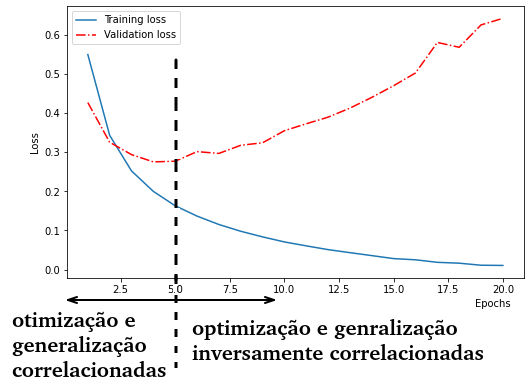


## Soluções possíveis

* Para evitar que um modelo aprenda padrões irrelevantes nos dados de treinamento, a melhor solução é, obviamente, obter **mais dados de treinamento**. 

Um modelo treinado em mais dados irá naturalmente generalizar melhor. Quando isso não é possível, a próxima melhor solução é **alterar a quantidade de informações que seu modelo pode aprender ou adicionar restrições sobre quais informações ele pode aprender**. 

* **Reduzir o modelo:** Se uma rede somente pode memorizar um pequeno número de padrões, o processo de otimização a forçará a se concentrar nos padrões mais proeminentes.

* **Penalização:** Penalizar a Loss para evitar o sobreajuste é denominado **regularização**. 

### Exemplo anterior (IMDB)

In [ ]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))                             # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                                               # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)                                       # Our vectorized training data
x_test = vectorize_sequences(test_data)                                         # Our vectorized test data
y_train = np.asarray(train_labels).astype('float32')                            # Our vectorized labels
y_test = np.asarray(test_labels).astype('float32')

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', 
                       loss='binary_crossentropy',
                       metrics=['acc'])

epochs = 16
original_hist = original_model.fit(x_train, y_train,
                                   epochs=epochs,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

## Reduzindo o modelo

A maneira mais simples de evitar o overfitting é **reduzir o tamanho do modelo**, ou seja, o número de parâmetros (que é determinado pelo número de camadas e pelo número de unidades por camada). 

* **Capacidade:** em DL o número de parâmetros treináveis em um modelo é freqüentemente referido como a "capacidade" do modelo. 

Intuitivamente, um modelo com mais parâmetros terá mais "capacidade de aprendizagem" (ou **memorização**) e, portanto, será capaz de aprender facilmente um mapeamento perfeito  entre as amostras de treinamento e seus rótulos. **Esse modelo seria inútil para classificar novas amostras de dígitos.**

Por outro lado, se a rede possui **capacidade de memorização limitada**, ela não será capaz memorizar e terá que **aprender representações compactadas e relevantes**. 

* Há um compromisso a ser encontrado entre **capacidade demais** e **capacidade insuficiente**.

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(## completar, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(## completar, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=epochs,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/16
49/49 [==============================] - 2s 45ms/step - loss: 0.5349 - acc: 0.8100 - val_loss: 0.4383 - val_acc: 0.8706
Epoch 2/16
49/49 [==============================] - 2s 33ms/step - loss: 0.3540 - acc: 0.8995 - val_loss: 0.3447 - val_acc: 0.8808
Epoch 3/16
49/49 [==============================] - 2s 33ms/step - loss: 0.2676 - acc: 0.9185 - val_loss: 0.3012 - val_acc: 0.8870
Epoch 4/16
49/49 [==============================] - 2s 33ms/step - loss: 0.2204 - acc: 0.9294 - val_loss: 0.2862 - val_acc: 0.8884
Epoch 5/16
49/49 [==============================] - 2s 33ms/step - loss: 0.1904 - acc: 0.9371 - val_loss: 0.2799 - val_acc: 0.8889
Epoch 6/16
49/49 [==============================] - 2s 33ms/step - loss: 0.1693 - acc: 0.9437 - val_loss: 0.2826 - val_acc: 0.8874
Epoch 7/16
49/49 [==============================] - 2s 33ms/step - loss: 0.1521 - acc: 0.9506 - val_loss: 0.2911 - val_acc: 0.8847
Epoch 8/16
49/49 [==============================] - 2s 33ms/step - loss: 0.1389 - a

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(## completar, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(## completar, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=epochs,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/16
49/49 [==============================] - 16s 322ms/step - loss: 0.4677 - acc: 0.8055 - val_loss: 0.3130 - val_acc: 0.8750
Epoch 2/16
49/49 [==============================] - 15s 315ms/step - loss: 0.2102 - acc: 0.9178 - val_loss: 0.3914 - val_acc: 0.8411
Epoch 3/16
49/49 [==============================] - 15s 316ms/step - loss: 0.1308 - acc: 0.9533 - val_loss: 0.3793 - val_acc: 0.8708
Epoch 4/16
49/49 [==============================] - 16s 319ms/step - loss: 0.0755 - acc: 0.9768 - val_loss: 0.5075 - val_acc: 0.8242
Epoch 5/16
49/49 [==============================] - 16s 317ms/step - loss: 0.0768 - acc: 0.9862 - val_loss: 0.4027 - val_acc: 0.8800
Epoch 6/16
49/49 [==============================] - 16s 317ms/step - loss: 0.0032 - acc: 0.9998 - val_loss: 0.6275 - val_acc: 0.8809
Epoch 7/16
49/49 [==============================] - 15s 315ms/step - loss: 0.0868 - acc: 0.9893 - val_loss: 0.5279 - val_acc: 0.8805
Epoch 8/16
49/49 [==============================] - 16s 326ms/step - 

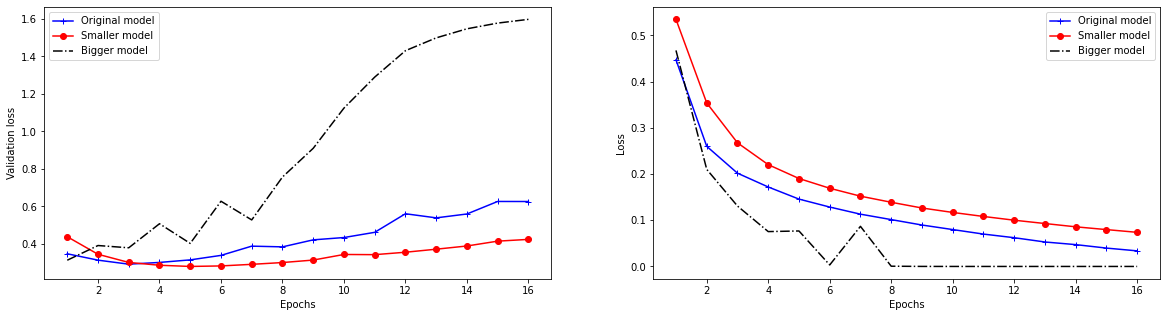

In [ ]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
bigger_model_val_loss = bigger_model_hist.history['val_loss']

original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), original_val_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), smaller_model_val_loss, '-ro', label='Smaller model')
plt.plot(range(1, epochs+1), bigger_model_val_loss, '-.k', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), original_train_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), smaller_model_train_loss, '-ro', label='Smaller model')
plt.plot(range(1, epochs+1), bigger_model_train_loss, '-.k', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Conclussões:**

* Como você pode ver, a rede menor começa a "overfitar" mais umas épocas depois (após 6 épocas, em vez de 4) e seu desempenho diminui muito mais lentamente quando começa a overfitting.

* A rede maior começa a "overfitar" quase imediatamente, após apenas uma época, e overfitting é muito mais severo. A validation loss também é mais ruidosa.

* A Loss do treino da rede maior chega perto de zero muito rapidamente. Quanto mais capacidade a rede tiver, mais rápido ela será capaz de modelar os dados de treinamento (resultando em uma baixa perda de treinamento), mas mais suscetível a overfitting (resultando em uma grande diferença entre a perda de treinamento e validação).

### **Infelizmente, não existe uma fórmula mágica para determinar qual é o número certo de camadas ou qual é o tamanho certo para cada camada.** 

Você terá que avaliar uma varias arquiteturas diferentes (no conjunto de validação) para encontrar o tamanho de modelo correto para seus dados. 

* **Dica:** em geral para encontrar um tamanho de modelo apropriado começamos com relativamente poucas camadas e parâmetros e aumentamos gradualmente o tamanho das camadas ou adicionar novas camadas até observar degradação nas métricas de validação.

## Adicionando regularização

**Modelo simples:** é um modelo onde a distribuição dos valores dos parâmetros tem menos entropia. 

Dados alguns dados de treinamento e uma arquitetura de rede, **existem vários conjuntos de pesos diferentes (vários modelos) que podem explicar os dados**, e modelos mais simples são menos susptíveis ao overfitting.

**Regularização:** uma forma comum de combater o overfitting colocando restrições na complexidade de uma rede, forçando seus pesos a assumirem apenas valores pequenos, o que torna a distribuição dos valores de peso mais "regular". 

A regularização é feita adicionando à função de perda um segundo termo:

1. **Regularização L2:** o custo adicionado é proporcional ao quadrado do valor dos pesos (ou seja, a "norma L2" dos pesos). 

$\text{Loss} = \min \sum_i^n \text{CE}(x) + \lambda R(w)$ 

onde CE é a cross-entropy e $w$ são os pesos da camada,

$\text{Loss} = \min \sum_i^n \text{CE}(x) + \lambda ||W||^2_2$ 

2. **Regularização L1:** o custo adicionado é proporcional ao valor absoluto dos coeficientes de pesos (ou seja, a "norma L1" dos pesos).

$\text{Loss} = \min \sum_i^n \text{CE}(x) + \lambda |W|$ 

se $\lambda=0$ então temos a funação de perda tradicional.

A principal diferença entre essas técnicas é L1 reduz os coeficiente menos importante para zero, removendo, assim, algumas possíveis combinações de fetures. Portanto, isso funciona bem para a seleção de features.

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, ## completar
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, ## completar
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=epochs,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/16
49/49 [==============================] - 2s 48ms/step - loss: 0.4859 - acc: 0.8188 - val_loss: 0.3814 - val_acc: 0.8770
Epoch 2/16
49/49 [==============================] - 2s 37ms/step - loss: 0.3155 - acc: 0.9058 - val_loss: 0.3653 - val_acc: 0.8716
Epoch 3/16
49/49 [==============================] - 2s 37ms/step - loss: 0.2695 - acc: 0.9210 - val_loss: 0.3295 - val_acc: 0.8892
Epoch 4/16
49/49 [==============================] - 2s 37ms/step - loss: 0.2522 - acc: 0.9268 - val_loss: 0.3350 - val_acc: 0.8871
Epoch 5/16
49/49 [==============================] - 2s 37ms/step - loss: 0.2375 - acc: 0.9342 - val_loss: 0.3456 - val_acc: 0.8822
Epoch 6/16
49/49 [==============================] - 2s 36ms/step - loss: 0.2308 - acc: 0.9363 - val_loss: 0.3754 - val_acc: 0.8714
Epoch 7/16
49/49 [==============================] - 2s 37ms/step - loss: 0.2261 - acc: 0.9378 - val_loss: 0.3631 - val_acc: 0.8769
Epoch 8/16
49/49 [==============================] - 2s 36ms/step - loss: 0.2191 - a

**L2(0,001)** significa que cada coeficiente na matriz de pesos da camada adicionará $0.001 * w_i$ à perda total da rede. 

Observe que, como essa penalidade só é adicionada no momento do treinamento, a perda para esta rede será muito maior no treinamento do que no momento do teste.

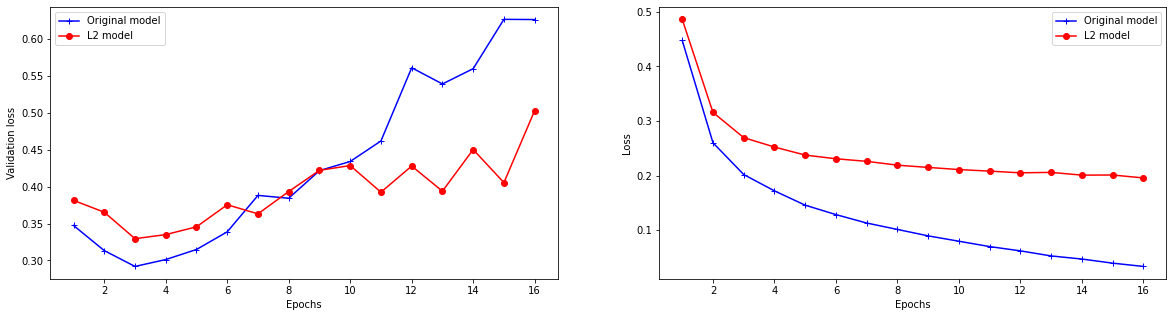

In [ ]:
original_val_loss = original_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

original_train_loss = original_hist.history['loss']
l2_model_train_loss = l2_model_hist.history['loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), original_val_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), l2_model_val_loss, '-ro', label='L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), original_train_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), l2_model_train_loss, '-ro', label='L2 model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Podemos ver que o modelo com regularização L2 tornou-se muito mais resistente ao overfitting do que o modelo de original, embora ambos os modelos tenham a mesma quantidade de parâmetros.

Como alternativa à regularização L2, você pode usar um dos seguintes regularizadores de peso Keras:

```
# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)
```



## Dropout

O Dorpout é uma das técnicas de regularização mais eficazes e mais comumente usadas para redes neurais. O Dropout aplica o conceito de eliminação aleatoriamente de neurónios durante o treinamento. 

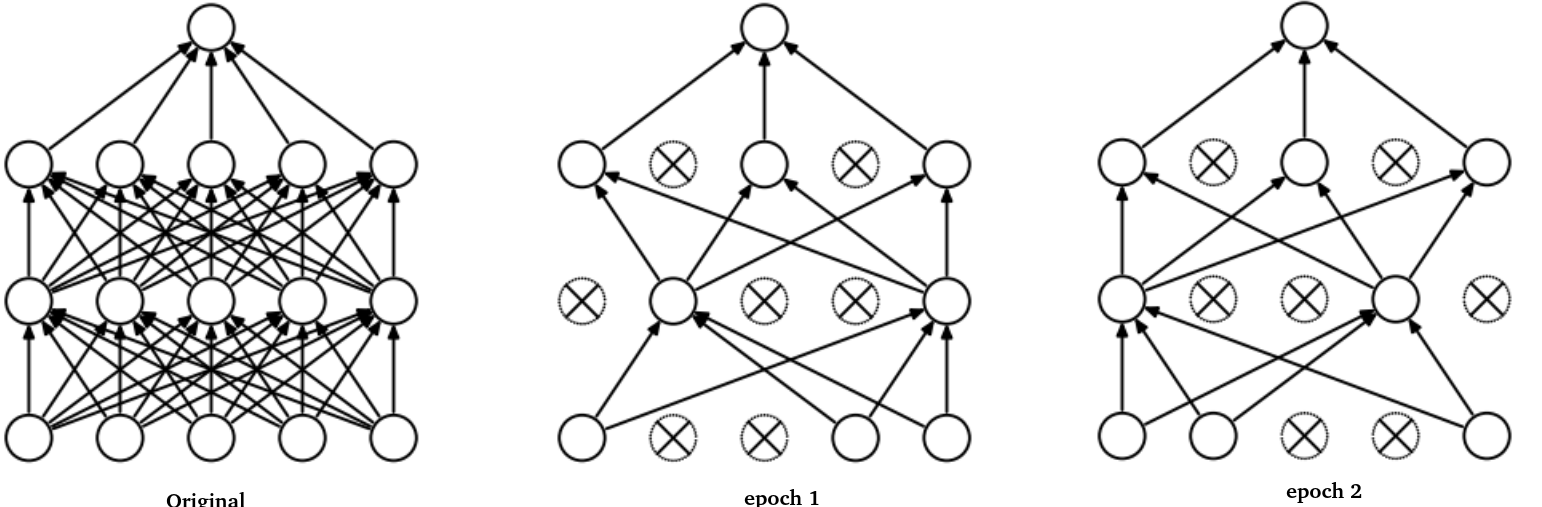

A **taxa de dropout** é a fração dos nouronios que são eliminados (geralmente é definido entre 0,2 e 0,5). 

Durante o teste, o dropout é desativado, em vez disso, os valores de saída da camada são reduzidos por um fator igual à taxa de dropout, de modo a equilibrar o fato de que mais unidades estão ativas do que no tempo de treinamento.

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

dpt_model.add(## completar)

dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(## completar)
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=epochs,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/16
49/49 [==============================] - 3s 68ms/step - loss: 0.5934 - acc: 0.6882 - val_loss: 0.4489 - val_acc: 0.8629
Epoch 2/16
49/49 [==============================] - 2s 36ms/step - loss: 0.4532 - acc: 0.8148 - val_loss: 0.3486 - val_acc: 0.8811
Epoch 3/16
49/49 [==============================] - 2s 35ms/step - loss: 0.3656 - acc: 0.8684 - val_loss: 0.3016 - val_acc: 0.8890
Epoch 4/16
49/49 [==============================] - 2s 36ms/step - loss: 0.3102 - acc: 0.8954 - val_loss: 0.2816 - val_acc: 0.8893
Epoch 5/16
49/49 [==============================] - 2s 35ms/step - loss: 0.2698 - acc: 0.9124 - val_loss: 0.2815 - val_acc: 0.8898
Epoch 6/16
49/49 [==============================] - 2s 35ms/step - loss: 0.2367 - acc: 0.9250 - val_loss: 0.2835 - val_acc: 0.8868
Epoch 7/16
49/49 [==============================] - 2s 36ms/step - loss: 0.2131 - acc: 0.9326 - val_loss: 0.2967 - val_acc: 0.8844
Epoch 8/16
49/49 [==============================] - 2s 36ms/step - loss: 0.1983 - a

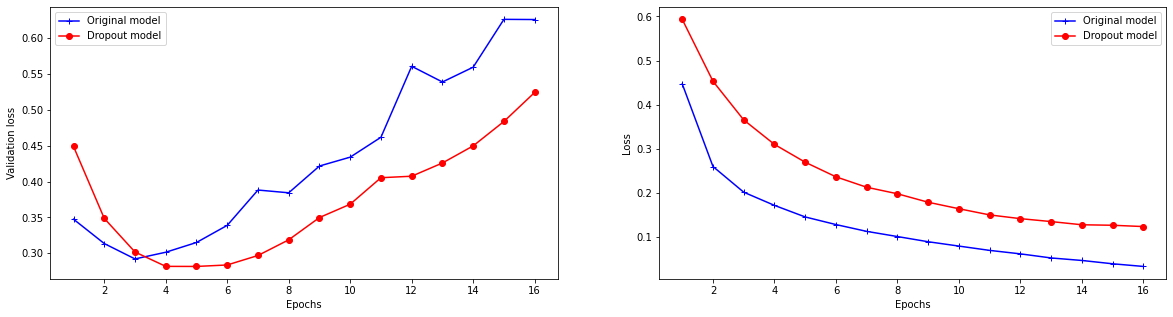

In [ ]:
original_val_loss = original_hist.history['val_loss']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

original_train_loss = original_hist.history['loss']
dpt_model_train_loss = dpt_model_hist.history['loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), original_val_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), dpt_model_val_loss, '-ro', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), original_train_loss, '-b+', label='Original model')
plt.plot(range(1, epochs+1), dpt_model_train_loss, '-ro', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Novamente, uma melhoria clara em relação ao modelo original.



---


**Resumindo:** as maneiras mais comuns de evitar overfitting em redes neurais:

1. Obtendo mais dados de treinamento.
2. Reduzindo a capacidade da rede.
3. Adicionando Dropout.
4. Adicionando regularização de peso.